<a href="https://colab.research.google.com/github/yusufbaykal/Patika.dev/blob/main/Binalar%C4%B1n_Enerji_Verimlili%C4%9Fi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Gerekli Kütüphanelerin Yüklenmesi**

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# **Verinin yüklenmesi ve İstatistik değerlerin kontrolü**

In [36]:
df = pd.read_csv("//content/ENB2012_data.csv")

In [37]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [38]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
X1,768.0,0.764167,0.105777,0.62,0.6825,0.75,0.8300,0.98
X2,768.0,671.708333,88.086116,514.50,606.3750,673.75,741.1250,808.50
X3,768.0,318.500000,43.626481,245.00,294.0000,318.50,343.0000,416.50
X4,768.0,176.604167,45.165950,110.25,140.8750,183.75,220.5000,220.50
X5,768.0,5.250000,1.751140,3.50,3.5000,5.25,7.0000,7.00
X6,768.0,3.500000,1.118763,2.00,2.7500,3.50,4.2500,5.00
X7,768.0,0.234375,0.133221,0.00,0.1000,0.25,0.4000,0.40
X8,768.0,2.812500,1.550960,0.00,1.7500,3.00,4.0000,5.00
Y1,768.0,22.307201,10.090196,6.01,12.9925,18.95,31.6675,43.10
Y2,768.0,24.587760,9.513306,10.90,15.6200,22.08,33.1325,48.03


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [40]:
df.isnull().sum()

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64

# **Verilerin Hazırlanması**

In [41]:
x = df.iloc[:,:-2]
y = df.iloc [:,-2]

In [42]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=0)

In [43]:
Sc = StandardScaler()
X_train = Sc.fit_transform(x_train)
X_test = Sc.fit_transform(x_test)

# **Random Forest**




In [44]:
random_li = RandomForestRegressor(n_estimators=10,n_jobs=-1)
random_li.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [45]:
y_pred = random_li.predict(x_test)

In [46]:
MAE = mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error(y,random_li.predict(x))
RMSE = np.sqrt(MSE)
print("Hata Kareler Ortalaması:",MSE)
print("Ortalama Mutlak Hata:",MAE)
print("Hata Kareler Ortalamasının Karesi:",RMSE)


Hata Kareler Ortalaması: 0.12687815885416664
Ortalama Mutlak Hata: 0.36101968503936976
Hata Kareler Ortalamasının Karesi: 0.35619960535374917


In [47]:
def rmse(x,y):
    return math.sqrt(((x-y)**2).mean())

In [48]:
def print_score(random_li):
    print(f"RMSE of train set'{rmse(random_li.predict(x_train), y_train)}")
    print(f"RMSE of test set {rmse(random_li.predict(x_test), y_test)}")
    print(f"R^2 of train set{random_li.score(x_train, y_train)}")
    print(f"R^2 of test set{random_li.score(x_test, y_test)}")

In [49]:
print_score(random_li)

RMSE of train set'0.2191454174920892
RMSE of test set 0.5352081168540486
R^2 of train set0.9995235349557291
R^2 of test set0.9972307986762202


In [50]:
random_li = RandomForestRegressor(n_estimators=30,n_jobs=-1)
%time random_li.fit(x_train,y_train)
print_score(random_li)

CPU times: user 66.1 ms, sys: 11.1 ms, total: 77.2 ms
Wall time: 116 ms
RMSE of train set'0.1912345289159861
RMSE of test set 0.5474844073491634
R^2 of train set0.9996371736017041
R^2 of test set0.9971023050922286


In [51]:
import sklearn.impute
from sklearn import impute
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
my_pipeline = make_pipeline(SimpleImputer(), RandomForestRegressor())
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

In [52]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(my_pipeline, x, y, scoring='neg_mean_absolute_error')
print(scores)

[-2.15667532 -0.39656429 -0.40477208 -0.43632222 -0.56314575]


In [53]:
cvm = cross_val_score(random_li,x,y,cv=5)
print(cvm)

[0.84254902 0.99582591 0.99670728 0.99647262 0.99425494]


In [54]:
print(cvm.mean(),cvm.std())

0.965161956637572 0.06131243994996435


In [55]:
rfc = RandomForestRegressor(random_state=0)

In [56]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [3,5,7,9,11,13],
    "bootstrap"    : [True, False]
}

In [57]:
cv_rfc = GridSearchCV(estimator=rfc,param_grid=param_grid,cv=5)
cv_rfc.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=0,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs=

In [58]:
print("R-Squared::{}".format(cv_rfc.best_score_))
print("Best Hyperparameters::\n{}".format(cv_rfc.best_params_))

R-Squared::0.9966537197110078
Best Hyperparameters::
{'bootstrap': True, 'max_depth': 9, 'max_features': 'auto', 'n_estimators': 500}


### **Model Görselleştirme**

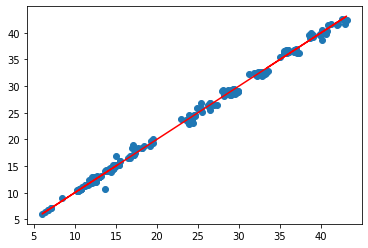

In [59]:
plt.scatter(y_test,y_pred)
plt.plot(y_test,y_test,color='red')

# **Polinomal Regresyon**

In [60]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [61]:
X = x.values
Y = y.values

In [62]:
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [63]:
from sklearn.preprocessing import PolynomialFeatures

In [64]:
ploy_reg = PolynomialFeatures(degree=4)
x_poly = ploy_reg.fit_transform(x)


In [65]:
lin_reg2 = LinearRegression()

In [66]:
lin_reg2.fit(x_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [67]:
r2_score(y,lin_reg2.predict(ploy_reg.fit_transform(x)))

0.998753734136945

In [68]:
cvm3 = cross_val_score(lin_reg2,x,y,cv=5)
print(cvm3)

[0.79532187 0.89744592 0.92389368 0.92483289 0.91740795]


In [69]:
print(cvm3.mean(),cvm3.std())

0.8917804640374746 0.04922773096076495


# **Decesion Tree**

In [70]:
from sklearn.tree import DecisionTreeRegressor

In [71]:
tree_li = DecisionTreeRegressor(random_state=0)

In [72]:
tree_li.fit(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [73]:
y_pred1 = tree_li.predict(x_test)

In [74]:
print_score(tree_li)

RMSE of train set'0.0
RMSE of test set 0.5963728950256374
R^2 of train set1.0
R^2 of test set0.9965616907039909


In [75]:
cvm1 = cross_val_score(tree_li,x,y,cv=5)
print(cvm1)

[0.84031514 0.99526127 0.99639962 0.99589942 0.9933977 ]


In [76]:
print(cvm1.mean(),cvm1.std())

0.9642546301033654 0.06197809229285369


In [77]:
param_grid = {"criterion": ["mse", "mae"],
              "min_samples_split": [10, 20, 40],
              "max_depth": [3,5,7,9,11,13],
              "min_samples_leaf": [20, 40, 100],
              "max_leaf_nodes": [5, 20, 100],
              }

In [78]:
grid_cv_tree_li = GridSearchCV(tree_li, param_grid, cv=5)
grid_cv_tree_li.fit(x,y)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': [3, 5, 7, 9, 11, 13],
                         'max_leaf_nodes': [5, 20, 100],
                         'min_sa

In [79]:
print("R-Squared::{}".format(grid_cv_tree_li.best_score_))
print("Best Hyperparameters::\n{}".format(grid_cv_tree_li.best_params_))

R-Squared::0.926720126417069
Best Hyperparameters::
{'criterion': 'mse', 'max_depth': 5, 'max_leaf_nodes': 100, 'min_samples_leaf': 20, 'min_samples_split': 10}


# **Ridge** **Regressor**


In [80]:
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge

In [81]:
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [82]:
y_pred2 = ridge_model.predict(x_train)

In [83]:
ridge_model.coef_

array([-1.96863105e+01, -8.56990675e-03,  3.75703651e-02, -2.30701358e-02,
        4.85322090e+00, -1.33058183e-01,  1.93123565e+01,  1.97872644e-01])

In [84]:
ridge_model.intercept_

5.1220670684080325

In [85]:
np.linspace(10,-2,100)
lambdalar = 10**np.linspace(10,-2,100,)*0.5

In [86]:
ridge_model = Ridge()
katsayılar= []

for i in lambdalar:
    ridge_model.set_params(alpha=i)
    ridge_model.fit(X_train,y_train)
    katsayılar.append(ridge_model.coef_)

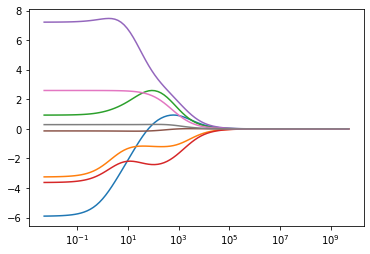

In [87]:
ax = plt.gca()
ax.plot(lambdalar,katsayılar)
ax.set_xscale("log")

In [88]:
ridge_model = Ridge().fit(x_train,y_train)
y_pred2 = ridge_model.predict(x_test)
np.sqrt(mean_squared_error(y_test,y_pred2))

3.2260249060719737

In [89]:
print_score(ridge_model)

RMSE of train set'2.8970777896519664
RMSE of test set 3.226024906071974
R^2 of train set0.9167303824011555
R^2 of test set0.8993892051512119


In [90]:
cvm2 = cross_val_score(ridge_model,x,y,cv=5)
print(cvm2)

[0.75652704 0.89796518 0.91929856 0.91531933 0.91784329]


In [91]:
print(cvm2.mean(),cvm2.std())

0.8813906801268561 0.0629008675269034
